# Analysis of Moran process data.

Copy latest version of the data with:

```
scp siren:Memory-size-in-the-prisoners-dilemma/moran_data/moran/data.csv .
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import opt_mo

In /Users/four/anaconda3/envs/opt-mo/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/four/anaconda3/envs/opt-mo/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/four/anaconda3/envs/opt-mo/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /Users/four/anaconda3/envs/opt-mo/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/four/anaconda3/envs/opt-mo/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib

In [2]:
df = pd.read_csv("data.csv")

def get_SEE_from_pandas_row(row):
    """
    A vectorized SSE calculation.
    """
    vector = row[
        [
            "Best_response_p1", 
            "Best_response_p2", 
            "Best_response_p3", 
            "Best_response_p4",
        ]
    ]
    return opt_mo.tools.get_least_squares(vector)

df["SSE"] = df.apply(get_SEE_from_pandas_row, axis=1)
df["ratio"] = df["x_K"] / df["non_dynamic_x_K"]

In [3]:
df.describe()

,seed,Opponent_p1,Opponent_p2,Opponent_p3,Opponent_p4,K,A_11,A_12,A_21,A_22,Best_response_p1,Best_response_p2,Best_response_p3,Best_response_p4,x_K,non_dynamic_x_K,SSE,ratio
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,823.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,807.000000,822.000000,831.000000,806.000000
mean,137.054152,0.480434,0.496431,0.495658,0.483983,2.000000,inf,3.031135,0.762406,2.139686,0.232345,0.226090,0.075402,0.142173,0.738876,0.735852,0.237099,1.004827
std,79.922150,0.289829,0.276956,0.285136,0.295030,0.816988,NaN,0.877987,0.757183,0.410096,0.360955,0.243003,0.251515,0.326103,0.210916,0.212622,0.328191,0.056941
min,0.000000,0.005413,0.002030,0.000114,0.001513,1.000000,1.000000,0.653884,0.020833,1.014448,0.000000,0.000000,0.000000,0.000000,0.131702,0.117852,0.000013,0.745088
25%,68.000000,0.218427,0.263145,0.258101,0.209089,1.000000,1.000000,2.468158,0.343272,1.963714,0.000000,0.000000,0.000000,0.000000,0.568591,0.566580,0.058824,1.000000
50%,137.000000,0.499694,0.515047,0.493670,0.498435,2.000000,1.000000,2.997671,0.513655,2.150336,0.000000,0.196886,0.000000,0.000000,0.796855,0.794616,0.122484,1.000000
75%,206.000000,0.732267,0.720607,0.731994,0.752272,3.000000,1.000000,3.641159,0.751779,2.423570,0.386961,0.293421,0.000000,0.000000,0.928660,0.928407,0.196548,1.000000
max,275.000000,0.989012,0.982039,0.999867,0.999155,3.000000,inf,4.916667,4.007382,2.942586,1.000000,1.000000,1.000000,1.000000,1.000000,0.999450,1.529412,1.825807


Remove duplicates (the data collection scrip did not increment the seed when starting a new run: so in fact duplicates the last seed).

In [4]:
df = df.drop_duplicates()
df.describe()

,seed,Opponent_p1,Opponent_p2,Opponent_p3,Opponent_p4,K,A_11,A_12,A_21,A_22,Best_response_p1,Best_response_p2,Best_response_p3,Best_response_p4,x_K,non_dynamic_x_K,SSE,ratio
count,828.00000,828.000000,828.000000,828.000000,828.000000,828.00000,820.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,804.000000,819.000000,828.000000,803.000000
mean,137.50000,0.480313,0.495429,0.494300,0.485707,2.00000,inf,3.030871,0.761480,2.143115,0.233187,0.226909,0.075675,0.140506,0.738554,0.735528,0.236100,1.004849
std,79.72197,0.290347,0.276955,0.284756,0.294166,0.81699,NaN,0.879367,0.758398,0.406850,0.361337,0.243061,0.251930,0.325004,0.211102,0.212830,0.327497,0.057038
min,0.00000,0.005413,0.002030,0.000114,0.001513,1.00000,1.000000,0.653884,0.020833,1.014448,0.000000,0.000000,0.000000,0.000000,0.131702,0.117852,0.000013,0.745088
25%,68.75000,0.217515,0.261852,0.257444,0.210659,1.00000,1.000000,2.467477,0.343272,1.967346,0.000000,0.000000,0.000000,0.000000,0.567403,0.566120,0.058824,1.000000
50%,137.50000,0.498902,0.514003,0.489202,0.498993,2.00000,1.000000,2.997671,0.513634,2.151449,0.000000,0.196959,0.000000,0.000000,0.796753,0.794450,0.121327,1.000000
75%,206.25000,0.733639,0.720395,0.729549,0.752852,3.00000,1.000000,3.641745,0.735672,2.423967,0.391843,0.293885,0.000000,0.000000,0.928623,0.928342,0.196109,1.000000
max,275.00000,0.989012,0.982039,0.999867,0.999155,3.00000,inf,4.916667,4.007382,2.942586,1.000000,1.000000,1.000000,1.000000,1.000000,0.999450,1.529412,1.825807


Remove missing values (this occurs in some calculations of the utility).

In [5]:
df = df.dropna()
df.describe()

,seed,Opponent_p1,Opponent_p2,Opponent_p3,Opponent_p4,K,A_11,A_12,A_21,A_22,Best_response_p1,Best_response_p2,Best_response_p3,Best_response_p4,x_K,non_dynamic_x_K,SSE,ratio
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,136.917808,0.476138,0.496399,0.494130,0.492031,1.998755,1.263695,3.042252,0.754871,2.145994,0.226058,0.227598,0.070559,0.139604,0.738228,0.737008,0.233833,1.004849
std,78.935977,0.289184,0.276502,0.282379,0.295441,0.816750,0.621975,0.878471,0.760993,0.404450,0.355760,0.243867,0.242679,0.324993,0.211031,0.212448,0.325794,0.057038
min,0.000000,0.005413,0.002030,0.000114,0.001513,1.000000,1.000000,0.653884,0.020833,1.014448,0.000000,0.000000,0.000000,0.000000,0.131702,0.117852,0.000013,0.745088
25%,69.500000,0.214733,0.264054,0.258101,0.209089,1.000000,1.000000,2.478224,0.339888,1.977453,0.000000,0.000000,0.000000,0.000000,0.567380,0.567360,0.058824,1.000000
50%,137.000000,0.490962,0.515047,0.493670,0.507789,2.000000,1.000000,2.997969,0.512379,2.157711,0.000000,0.197004,0.000000,0.000000,0.796651,0.796556,0.120212,1.000000
75%,204.500000,0.729014,0.720466,0.730364,0.760657,3.000000,1.000000,3.652579,0.727112,2.424364,0.357507,0.293421,0.000000,0.000000,0.928530,0.928660,0.188993,1.000000
max,275.000000,0.989012,0.982039,0.990345,0.999155,3.000000,4.000000,4.916667,4.007382,2.941925,1.000000,1.000000,1.000000,1.000000,0.999450,0.999450,1.529412,1.825807


In [6]:
def plot_figure(df):
    """
    Plot the figure for a given dataframe of data.
    
    This plots a 1 by 3 figure:
    
    First row:
        - first figure: Violon plot of x_K (4 violons: 1 for each value of K and 1 overall)
        - second figure: Violon plot of SSE (4 violons: 1 for each value of K and 1 overall)
        - third figure: Violon plot of the x_K / non_dynamic_x_K (4 "violons" 1 for each p*_i)
    """

    K_range = sorted(df["K"].unique())
    x_ticks = range(1, 5)
    x_tick_labels = ["1", "2", "3", "All"]
    fig, axarray = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    
    for ax, variable in zip(axarray, ["x_K", "SSE", "ratio"]):
        data = [
            list(df[df["K"] == K][variable]) for K in K_range
        ] + [list(df[variable])]
        ax.violinplot(data, showmeans=True, showextrema=True, showmedians=True)
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_tick_labels)
        if variable == "x_K":
            variable = "$x_K$"
        ax.set_title(variable)
        ax.set_xlabel("$K$")
    
    return fig

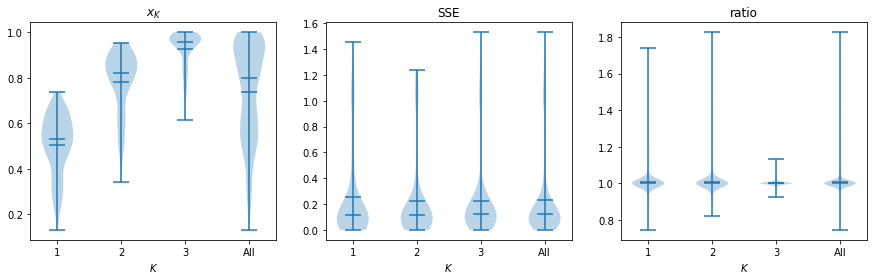

In [7]:
plot_figure(df=df);

In [8]:
df.describe()[["x_K", "SSE", "ratio"]].transpose()

,count,mean,std,min,25%,50%,75%,max
x_K,803.0,0.738228,0.211031,0.131702,0.567380,0.796651,0.928530,0.999450
SSE,803.0,0.233833,0.325794,0.000013,0.058824,0.120212,0.188993,1.529412
ratio,803.0,1.004849,0.057038,0.745088,1.000000,1.000000,1.000000,1.825807


In some instances the dynamic best response algorithm finds a better strategy however against a given opponent this results in the same game.

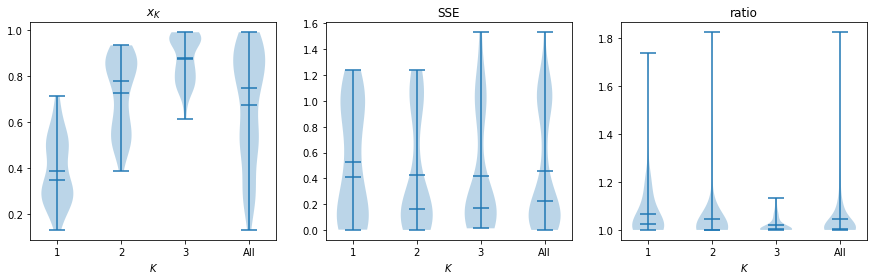

In [9]:
df_with_improved_performance = df[df["x_K"] > df["non_dynamic_x_K"]]
plot_figure(df=df_with_improved_performance);

In [10]:
df_with_improved_performance.describe()[["x_K", "SSE", "ratio"]].transpose()

,count,mean,std,min,25%,50%,75%,max
x_K,182.0,0.676363,0.240365,0.131702,0.504685,0.748060,0.875748,0.991714
SSE,182.0,0.455551,0.444057,0.002620,0.092303,0.225547,1.007053,1.529412
ratio,182.0,1.043772,0.100055,1.000000,1.000000,1.003502,1.048527,1.825807
